## Foundations of Data Science: Computational Thinking with Python

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 10: Groups and Pivot

In [173]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
pd.set_option('max_rows', 9)

### Single Attribute Groups

In [2]:
cones = pd.DataFrame([['strawberry', 3.55, 1, 'Yum'],
                      ['chocolate',  4.75, 1, 'awesome'],
                      ['chocolate',  5.25, 2, 'meh'],
                      ['strawberry', 5.25, 2, ':)'],
                      ['chocolate',  5.25, 2, 'Wow']],
                     columns=['Flavor', 'Price', 'Scoops', 'Reaction'])
cones

,Flavor,Price,Scoops,Reaction
0,strawberry,3.55,1,Yum
1,chocolate,4.75,1,awesome
2,chocolate,5.25,2,meh
3,strawberry,5.25,2,:)
4,chocolate,5.25,2,Wow


In [3]:
# Counts
#  value_counts is essientially groupby then count
print(cones.Flavor.value_counts())
print()
print(cones.groupby('Flavor').Flavor.count())

chocolate     3
strawberry    2
Name: Flavor, dtype: int64

Flavor
chocolate     3
strawberry    2
Name: Flavor, dtype: int64


In [4]:
# Viewing groups

# Dictionary of groups to indicies in group
print(cones.groupby('Flavor').groups)
print()

# Dictionary of groups to items in groups 
print(dict(list(cones.groupby('Flavor'))))
print()

# Groups in nice tables
for key in dict(list(cones.groupby('Flavor'))):
    display(dict(list(cones.groupby('Flavor')))[key])

{'chocolate': Int64Index([1, 2, 4], dtype='int64'), 'strawberry': Int64Index([0, 3], dtype='int64')}

{'chocolate':       Flavor  Price  Scoops Reaction
1  chocolate   4.75       1  awesome
2  chocolate   5.25       2      meh
4  chocolate   5.25       2      Wow, 'strawberry':        Flavor  Price  Scoops Reaction
0  strawberry   3.55       1      Yum
3  strawberry   5.25       2       :)}



,Flavor,Price,Scoops,Reaction
1,chocolate,4.75,1,awesome
2,chocolate,5.25,2,meh
4,chocolate,5.25,2,Wow


,Flavor,Price,Scoops,Reaction
0,strawberry,3.55,1,Yum
3,strawberry,5.25,2,:)


In [5]:
# Groupby summery information
display(cones.groupby('Flavor').describe())

display(cones.loc[:, ['Flavor', 'Reaction']].groupby('Flavor').describe())

Price                                                     Scoops  \
           count      mean       std   min    25%   50%    75%   max  count   
Flavor                                                                        
chocolate    3.0  5.083333  0.288675  4.75  5.000  5.25  5.250  5.25    3.0   
strawberry   2.0  4.400000  1.202082  3.55  3.975  4.40  4.825  5.25    2.0   

                                                           
                mean       std  min   25%  50%   75%  max  
Flavor                                                     
chocolate   1.666667  0.577350  1.0  1.50  2.0  2.00  2.0  
strawberry  1.500000  0.707107  1.0  1.25  1.5  1.75  2.0

Reaction                 
              count unique  top freq
Flavor                              
chocolate         3      3  meh    1
strawberry        2      2  Yum    1

In [6]:
# GroupBy aggregates
print(cones.groupby('Flavor').Price.agg('min'))
display(cones.groupby('Flavor').agg('min'))
display(cones.groupby('Flavor').agg('mean'))

Flavor
chocolate     4.75
strawberry    3.55
Name: Price, dtype: float64


,Price,Scoops,Reaction
Flavor,,,
chocolate,4.75,1,Wow
strawberry,3.55,1,:)


,Price,Scoops
Flavor,,
chocolate,5.083333,1.666667
strawberry,4.400000,1.500000


In [7]:
# Applying functions to GroupBy objects
cones.groupby('Flavor').apply(lambda df: df.Price.max() - df.Price.min())

Flavor
chocolate     0.5
strawberry    1.7
dtype: float64

In [8]:
# More examples
nba = pd.read_csv('data/nba_salaries.csv')
nba.rename({'2015-2016 SALARY':'SALARY'}, axis='columns', inplace=True)

nba.groupby('TEAM').agg('sum').sort_values('SALARY', ascending=False)

,SALARY
TEAM,
Cleveland Cavaliers,102.312412
Oklahoma City Thunder,96.832165
Golden State Warriors,94.085137
Memphis Grizzlies,93.796439
...,...
Boston Celtics,50.285499
Portland Trail Blazers,45.446878
Philadelphia 76ers,42.481345
Detroit Pistons,42.211760


In [9]:
nba['POSITION'].value_counts()

nba.groupby('POSITION').agg('mean').SALARY.sort_values()

POSITION
SG    3.988195
PF    4.951344
PG    5.165487
SF    5.532675
C     6.082913
Name: SALARY, dtype: float64

### Multi Attribute Groups - Cross Classification

In [33]:
all_cones = pd.DataFrame([['strawberry', 'pink', 3.55, 1, 'Awesome'],
                          ['chocolate', 'light brown', 4.75, 1, 'yummy'],
                          ['chocolate', 'dark brown', 5.25, 2, 'meh'],
                          ['strawberry', 'pink', 5.25, 3, 'wow'],
                          ['chocolate', 'dark brown', 5.25, 1, ':)'],
                          ['bubblegum', 'pink', 4.75, 2, ':P']],
                     columns=['Flavor', 'Color', 'Price', 'Scoops', 'Reaction'])
all_cones

,Flavor,Color,Price,Scoops,Reaction
0,strawberry,pink,3.55,1,Awesome
1,chocolate,light brown,4.75,1,yummy
2,chocolate,dark brown,5.25,2,meh
3,strawberry,pink,5.25,3,wow
4,chocolate,dark brown,5.25,1,:)
5,bubblegum,pink,4.75,2,:P


In [47]:
#display(all_cones.groupby(['Flavor', 'Color']).describe())

#for key in dict(list(all_cones.groupby(['Flavor', 'Color']))):
#    display(dict(list(all_cones.groupby(['Flavor', 'Color'])))[key])

all_cones.groupby(['Flavor', 'Color']).size()

Flavor      Color      
bubblegum   pink           1
chocolate   dark brown     2
            light brown    1
strawberry  pink           2
dtype: int64

In [32]:
all_cones.groupby(['Flavor', 'Color']).max()

Price  Scoops
Flavor     Color                     
bubblegum  pink          4.75       2
chocolate  dark brown    5.25       2
           light brown   4.75       1
strawberry pink          5.25       3

In [51]:
nba.groupby(['TEAM', 'POSITION']).SALARY.agg('mean')

TEAM                POSITION
Atlanta Hawks       C            7.585417
                    PF          11.002496
                    PG           4.881700
                    SF           3.000000
                                  ...    
Washington Wizards  PF           5.246667
                    PG           6.720472
                    SF           4.142925
                    SG           2.839248
Name: SALARY, Length: 147, dtype: float64

In [54]:
edu = pd.read_csv('data/educ_inc.csv')
edu

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
...,...,...,...,...,...,...
1022,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282
1025,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"H: 75,000 and over",1628605


In [66]:
ca_2014 = (edu
           .loc[(edu.Year == '1/1/14 0:00') & (edu.Age != '00 to 17')]
           .drop('Year', axis='columns')
           .sort_values(by='Population Count')
          )

no_ages = ca_2014.drop('Age', axis='columns')
no_ages.groupby(['Gender', 'Educational Attainment', 'Personal Income']).size()

Gender  Educational Attainment       Personal Income    
Female  Bachelor's degree or higher  A: 0 to 4,999          2
                                     B: 5,000 to 9,999      2
                                     C: 10,000 to 14,999    2
                                     D: 15,000 to 24,999    2
                                                           ..
Male    No high school diploma       E: 25,000 to 34,999    2
                                     F: 35,000 to 49,999    2
                                     G: 50,000 to 74,999    2
                                     H: 75,000 and over     2
Length: 64, dtype: int64

In [82]:
# Which team pays the most for their starters
#   assumng starters are the highest paid on team at their position

(nba
  .groupby(['TEAM','POSITION']).agg('max').reset_index()
  .groupby(['TEAM']).agg('sum')
  .sort_values('SALARY', ascending=False))

,SALARY
TEAM,
Cleveland Cavaliers,82.316636
Oklahoma City Thunder,70.698770
Miami Heat,67.127342
San Antonio Spurs,67.034000
...,...
Detroit Pistons,29.525004
Portland Trail Blazers,28.335864
Philadelphia 76ers,26.247027
Boston Celtics,25.568939


### Pivot (Contingency) Tabels

In [122]:
(all_cones
 .loc[:, ['Color', 'Flavor']]
 .pivot_table(index='Color', columns='Flavor', aggfunc=len, 
              fill_value=0, dropna=False)
)

Flavor,bubblegum,chocolate,strawberry
Color,,,
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [124]:
(all_cones
 .pivot_table(index='Flavor', columns='Color', values='Price', aggfunc=max, 
              fill_value=0)
)

Color,dark brown,light brown,pink
Flavor,,,
bubblegum,0.00,0.00,4.75
chocolate,5.25,4.75,0.00
strawberry,0.00,0.00,5.25


In [127]:
nba.pivot_table('SALARY', 'TEAM', 'POSITION', aggfunc=np.mean)

POSITION,C,PF,PG,SF,SG
TEAM,,,,,
Atlanta Hawks,7.585417,11.002496,4.881700,3.000000,1.809692
Boston Celtics,2.450465,3.085480,4.974652,4.417161,2.007554
Brooklyn Nets,1.362897,4.452514,3.900000,13.040323,1.741178
Charlotte Hornets,6.772240,4.685770,4.485304,3.766422,4.042384
...,...,...,...,...,...
San Antonio Spurs,4.650000,10.594093,5.987908,6.245388,6.407000
Toronto Raptors,3.105494,3.048442,4.756891,6.225972,5.350000
Utah Jazz,1.674385,2.654025,1.973742,6.146973,3.779006
Washington Wizards,8.739130,5.246667,6.720472,4.142925,2.839248


In [135]:
# Teams with highest paid starters, not use groupby
starters = nba.pivot_table('SALARY', 'TEAM', 'POSITION', aggfunc=np.max)
starters['Total'] = starters.sum(axis='columns')
starters.sort_values('Total', ascending=False)


POSITION,C,PF,PG,SF,SG,Total
TEAM,,,,,,
Cleveland Cavaliers,14.260870,19.68900,16.407501,22.970500,8.988765,82.316636
Oklahoma City Thunder,16.407500,12.25000,16.744218,20.158622,5.138430,70.698770
Miami Heat,NaN,22.19273,14.783000,10.151612,20.000000,67.127342
San Antonio Spurs,7.500000,19.68900,13.437500,16.407500,10.000000,67.034000
...,...,...,...,...,...,...
Detroit Pistons,6.500000,NaN,13.913044,2.841960,6.270000,29.525004
Portland Trail Blazers,6.980802,3.07588,4.236287,8.042895,6.000000,28.335864
Philadelphia 76ers,4.626960,6.50000,2.144772,10.105855,2.869440,26.247027
Boston Celtics,2.616975,5.00000,7.730337,6.796117,3.425510,25.568939


In [139]:
# As above, but using .apply (good to know for when functions aren't built in)
starters = nba.pivot_table('SALARY', 'TEAM', 'POSITION', aggfunc=np.max)
starters['Total'] = starters.apply(lambda row: sum(row), axis='columns')
starters.sort_values('Total', ascending=False)

POSITION,C,PF,PG,SF,SG,Total
TEAM,,,,,,
Cleveland Cavaliers,14.260870,19.68900,16.407501,22.970500,8.988765,82.316636
Oklahoma City Thunder,16.407500,12.25000,16.744218,20.158622,5.138430,70.698770
San Antonio Spurs,7.500000,19.68900,13.437500,16.407500,10.000000,67.034000
Golden State Warriors,13.800000,14.26087,11.370786,11.710456,15.501000,66.643112
...,...,...,...,...,...,...
Boston Celtics,2.616975,5.00000,7.730337,6.796117,3.425510,25.568939
Detroit Pistons,6.500000,NaN,13.913044,2.841960,6.270000,NaN
Miami Heat,NaN,22.19273,14.783000,10.151612,20.000000,NaN
Sacramento Kings,15.851950,NaN,9.500000,12.403101,6.060606,NaN


In [228]:
ca_2014

,Age,Gender,Educational Attainment,Personal Income,Population Count
885,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
886,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
894,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
895,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
...,...,...,...,...,...
1022,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282
1025,18 to 64,Male,Bachelor's degree or higher,"H: 75,000 and over",1628605


In [248]:
# Education / Income
edu_inc = ca_2014.pivot_table('Population Count', 'Personal Income', 'Educational Attainment',
               aggfunc=np.sum)
edu_inc

Educational Attainment,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
Personal Income,,,,
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [257]:
edu_inc_percent = (edu_inc / edu_inc.sum(axis='rows')) * 100
edu_inc_percent

Educational Attainment,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
Personal Income,,,,
"A: 0 to 4,999",6.750075,12.668142,18.459596,28.286770
"B: 5,000 to 9,999",3.823968,10.425584,9.953685,14.020671
"C: 10,000 to 14,999",5.306885,10.270675,11.004854,15.607416
"D: 15,000 to 24,999",9.074729,17.301235,19.897505,20.559912
"E: 25,000 to 34,999",8.138735,14.039514,14.763222,10.909671
"F: 35,000 to 49,999",13.169491,14.306751,12.437027,6.119353
"G: 50,000 to 74,999",18.704404,11.366810,8.349305,3.111963
"H: 75,000 and over",35.031712,9.621289,5.134807,1.384245


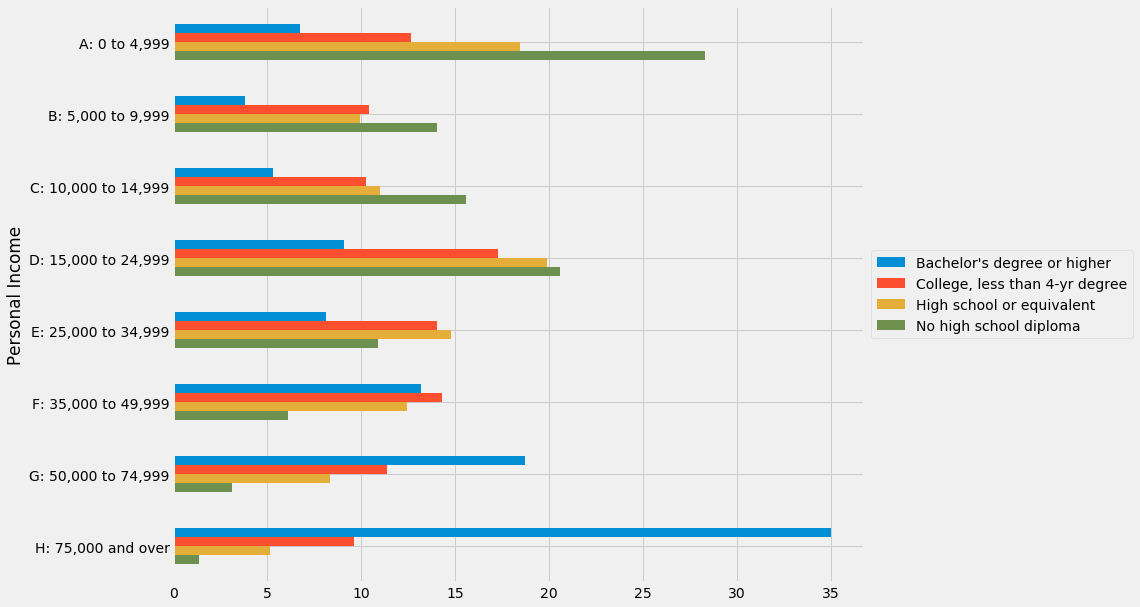

In [254]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
edu_inc_percent.plot.barh(ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.set_size_inches(12, 8)
plt.gca().invert_yaxis() # Plot top to bottom
plt.show()